# Overview of Knoll

Here we consider the scenario where we can take a background only count to assess the background levels. We measure $N_T$ (signal + background) and $N_B$ background-only both with equal time. Asymptotically this yields
$$N_S = N_T - N_B$$
Given that we deal with finite counts we choose a cut-off with low false positive and low false negative.
We can rewrite this as arbitrary probability distributions in the finite regime where we denote the measured number of events as $n$ and the estimator of $N$ as $\hat{N}$.

$$P_S(\nu) = \int_{-\infty}^{\infty}P_T(n)P_B(\nu-n)~dn$$

__Knoll Assumption 1__: $N_T, N_B, N_S$ are normally distributed.


In [7]:
## Import / Setup
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf, erfc, gamma

In [11]:
# Useful functions and definitions
π = np.pi
plt.style.use('stats.mplstyle')
def normal(x, μ, σ):
    return (2*π*σ**2)**(-0.5) * np.exp(-(x-μ)**2 / 2 / σ**2)

__Case 1__: $N_S = 0 \rightarrow N_T=N_B ~~\text{and}~~ \sigma_T=\sigma_B$
$$P_B(n) = \text{normal}(n, \mu_B, \sigma_B)$$
With just a bit of math we can perform the above convolution and determine that 
$$P_S(\nu) = \text{normal}(n, 0, \sqrt{2}\sigma_B)$$ 
__Knoll Assumption 2:__ We are interested in a one-side confidence interval that spans $\alpha=0.95$ from $-\infty$

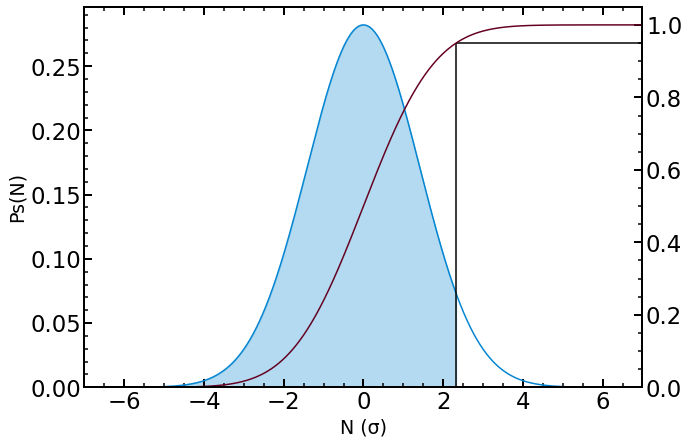

We find a 95% confidence at N >= 2.326σ


In [102]:
## In units of sigma, this looks like
n = np.linspace(-7,7,100000)
p = normal(n, 0, np.sqrt(2))
c = np.cumsum(p) / max(np.cumsum(p))
limit = np.where(c<=0.95)[0]

fig, ax1 = plt.subplots()
ax1.plot(n, p, color='xkcd:cerulean') 
ax1.fill_between(n[limit], p[limit], color='xkcd:cerulean', alpha=0.3) 
ax1.set_ylim(bottom=0)
ax1.set_xlim(-7, 7)
ax1.set_xlabel("N (σ)")
ax1.set_ylabel("Ps(N)")
ax2 = ax1.twinx()
ax2.plot(n, c, color='xkcd:maroon')
#ax2.axvline(n[limit[-1]], color='black')
ax2.vlines(n[limit[-1]], 0, 0.95, color='black')
ax2.hlines(0.95, n[limit[-1]], 7)
ax2.set_ylim(bottom=0)
plt.show()

Lc_coef = n[limit[-1]]

print(f'We find a 95% confidence at N >= {Lc_coef:0.3f}σ')

Note we recovered the number found in Knoll (2.326)


__Case 2:__ Now we consider an expected signal $N_S > 0$
Now when we consider the probability $P_S$, we must account for the additional signal component:
$$P_S(\nu) = \text{normal}(n, N_S, \sqrt{2\sigma_B^2+\sigma_S^2})$$ 
From above we determine our cut-off point to be at $L_c = 2.326\sigma_b$, we now want to determine the lowest possibel signal that would still have at most a false negative value of 0.05% when cutting at $L_c$. To do this we must solve:
$$0.05 \geq \int_{-\infty}^{L_c} \text{normal}(n, N_S, \sqrt{2\sigma_B^2+\sigma_S^2}$$
for $N_S$. In the case were we only have statistical uncertainty, we can let $\sigma_B^2 = N_B$ and $\sigma_S^2 = N_S$, which simplifies the problem (after a few taylor expansions) to:
$$N_S \geq 4.653\sigma_B + 2.706$$

Knoll: 38.748
Lc: 18.018
Alpha: 0.050


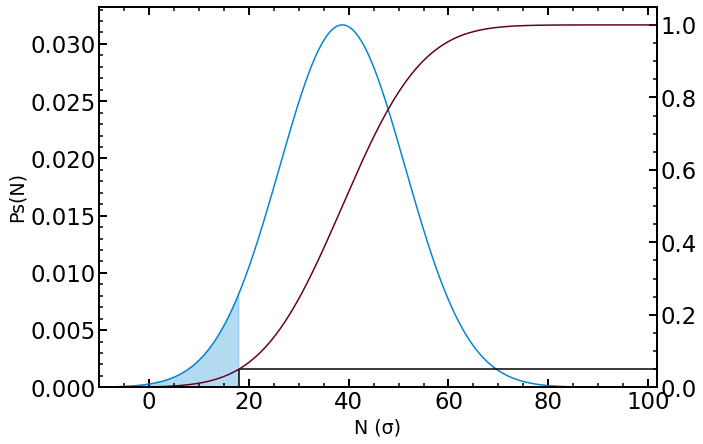

In [126]:
## Example to test the Knoll hypothesis
knoll = lambda σ: 4.653*σ + 2.706
n = np.linspace(-1000,1000,100000)

nb = 60
ns = knoll(np.sqrt(nb))
print(f'Knoll: {ns:0.3f}')
Lc = Lc_coef*np.sqrt(nb)
print(f'Lc: {Lc:0.3f}')
σt = np.sqrt(ns+2*nb)
p = normal(n, ns, σt)
c = np.cumsum(p) / max(np.cumsum(p))
x_alpha = np.where(n>=Lc)[0][0]
alpha   = c[x_alpha]
n_alpha = n[x_alpha]
print(f'Alpha: {alpha:0.3f}')

xtop = (ns + 5*σt)

fig, ax1 = plt.subplots()
ax1.plot(n, p, color='xkcd:cerulean') 
ax1.fill_between(n[n<=n_alpha], p[n<=n_alpha], color='xkcd:cerulean', alpha=0.3) 
ax1.set_ylim(bottom=0)
ax1.set_xlim(-10, xtop)
ax1.set_xlabel("N (σ)")
ax1.set_ylabel("Ps(N)")
ax2 = ax1.twinx()
ax2.plot(n, c, color='xkcd:maroon')
#ax2.axvline(n[limit[-1]], color='black')
ax2.vlines(n_alpha, 0, alpha, color='black')
ax2.hlines(alpha, n_alpha, xtop)
ax2.set_ylim(bottom=0)
plt.show()

For this test case, we have confirmed the assumptions set by Knoll for a cut-off experiment.
In the next notebook let us explore signal sensitiv